In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/spam.csv',encoding='latin-1',on_bad_lines='skip')

In [3]:
#Steps to make a classifier
# 1.  Data Cleaning
# 2.  Data Analysis
# 3.  Text Pre-processing
# 4.  Model Building
# 5.  Evaluation of Model
# 6.  Improvments in Model
# 7.  Making a website
# 8.  Deploy on Heroku

# Data Cleaning

In [4]:
#df.describe

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [8]:
df.isnull().sum()    # there are no missing values so no need to do imputation etc...

target    0
text      0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()


403

In [10]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Data Analysis

In [11]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [12]:
import matplotlib.pyplot as plt
#plt.pie(df['target'].value_counts(),labels=['Right','spam'],autopct='%0.2f')

In [13]:
# Now we know how much data is spam and how much is right it is best to know about the data that you are applying machine learning
# on
# As you can see data is quite imbalanced here is the problem if you don't do  this step then you will keep on apllying different 
# algorithms but won't see good result because the problem is in data just look at it right = 86.59% whereas spam = 13.41%

In [14]:
# Now let us do more deeper analysis of this data
import nltk
#!pip install nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
df['num_characters'] = df['text'].apply(len)

In [17]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
#df[['num_characters','num_words','num_sentences']].describe()

In [19]:
import seaborn as sns

In [20]:
#sns.histplot(df[df['target']==0]['num_characters'])
#sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_4300\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

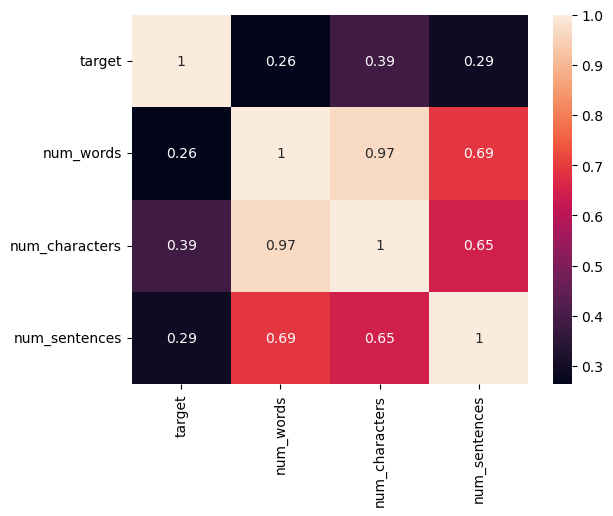

In [21]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

Lowercase

Tokenization

Removing Special characters

Removing Stop words

Stemming

In [22]:
# All the above mentioned things have been done in this little function
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [23]:
df['transformed_text'] = df['text'].apply(transform_text)

In [24]:
#df.head()

In [25]:
# Now Wordl cloud will bemade to understand the words that are highly important
#!pip install wordcloud
from wordcloud import WordCloud

In [26]:
wc = WordCloud(width = 500,height=500,min_font_size=10,background_color='white')

In [27]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

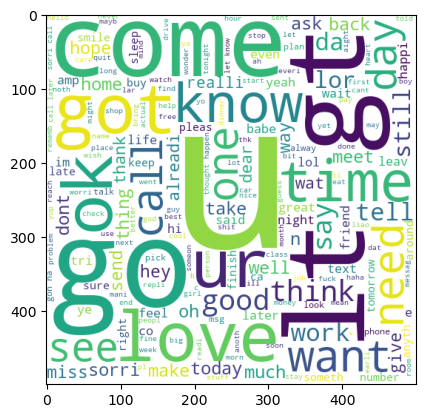

In [44]:
plt.imshow(spam_wc)  #like in this call is biggest it means that it is of highest weightage

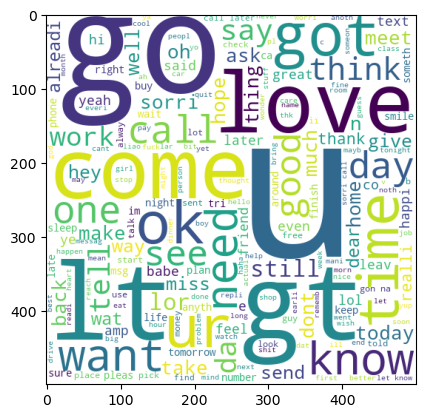

In [45]:
right_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [30]:
df.head() #Now this is the final dataset that we have obtained

,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


# Model Building

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()  # this converts text to vectors/numbers 
tfidf = TfidfVectorizer() # this also converts text to words but on basis of how important that word is

In [32]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [33]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

# as you can see scaling caused precison and accuracy to drop hence we will not do it

In [34]:
X # look at this machine learning works on this type of data (array)datasets data jo bhi ho usse matlab nhi bas end mai usko aaray de do

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
y = df['target'].values

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [38]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [39]:
gnb.fit(X_train,y_train)
pred1 = gnb.predict(X_test)
print("accuracy: ",accuracy_score(y_test,pred1))
print("precison: ",precision_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))

accuracy:  0.8690582959641255
precison:  0.5252100840336135
[[844 113]
 [ 33 125]]


In [40]:
mnb.fit(X_train,y_train)
pred2 = mnb.predict(X_test)
print("accuracy: ",accuracy_score(y_test,pred2))
print("precison: ",precision_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))

accuracy:  0.957847533632287
precison:  1.0
[[957   0]
 [ 47 111]]


In [41]:
bnb.fit(X_train,y_train)
pred3 = bnb.predict(X_test)
print("accuracy: ",accuracy_score(y_test,pred3))
print("precison: ",precision_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))

accuracy:  0.9695067264573991
precison:  0.9920634920634921
[[956   1]
 [ 33 125]]


In [42]:
# we care more about precison rather than accuarcy in text type model

In [43]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))